In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df["parental level of education"].value_counts()/10

parental level of education
some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: count, dtype: float64

In [6]:
df.groupby(["parental level of education", "race/ethnicity"])[["math score", "writing score", "reading score"]].std()

math score  writing score  \
parental level of education race/ethnicity                              
associate's degree          group A          17.168845      15.775903   
                            group B          14.867422      13.854206   
                            group C          14.177605      13.679706   
                            group D          14.691383      13.738089   
                            group E          15.324207      15.879778   
bachelor's degree           group A          14.989896      12.279572   
                            group B          12.401613      13.967161   
                            group C          15.999279      13.889306   
                            group D          14.088158      16.226041   
                            group E          15.819654      16.500050   
high school                 group A          11.490263      13.703799   
                            group B          15.631336      16.502095   
                            group C          14.776342      13.024054   
                            group D          12.821840      13.547407   
                            group E          14.790382      12.629245   
master's degree             group A          13.279056       8.386497   
                            group B          16.485347      16.999020   
                            group C          13.389356      11.654129   
                            group D          15.287754      12.721554   
                            group E          17.951820      16.274432   
some college                group A          15.911109      17.489493   
                            group B          15.280412      15.698262   
                            group C          14.588385      16.408313   
                            group D          11.890386      13.011667   
                            group E          14.141066      12.690432   
some high school            group A          14.206296      16.906178   
                            group B          16.771687      15.424690   
                            group C          14.842312      15.390744   
                            group D          14.538562      14.515650   
                            group E          19.210564      17.126595   

                                            reading score  
parental level of education race/ethnicity                 
associate's degree          group A             14.756820  
                            group B             14.319524  
                            group C             12.781235  
                            group D             13.215961  
                            group E             15.993209  
bachelor's degree           group A             13.124982  
                            group B             13.012039  
                            group C             13.125406  
                            group D             15.775542  
                            group E             16.198221  
high school                 group A             14.037299  
                            group B             16.352446  
                            group C             12.919537  
                            group D             13.607997  
                            group E             13.296567  
master's degree             group A             10.692677  
                            group B             17.081179  
                            group C             12.010960  
                            group D             12.932173  
                            group E             15.468286  
some college                group A             17.764987  
                            group B             14.638999  
                            group C             15.003339  
                            group D             12.614953  
                            group E             11.287905  
some high school            group A             17.609080  
                           

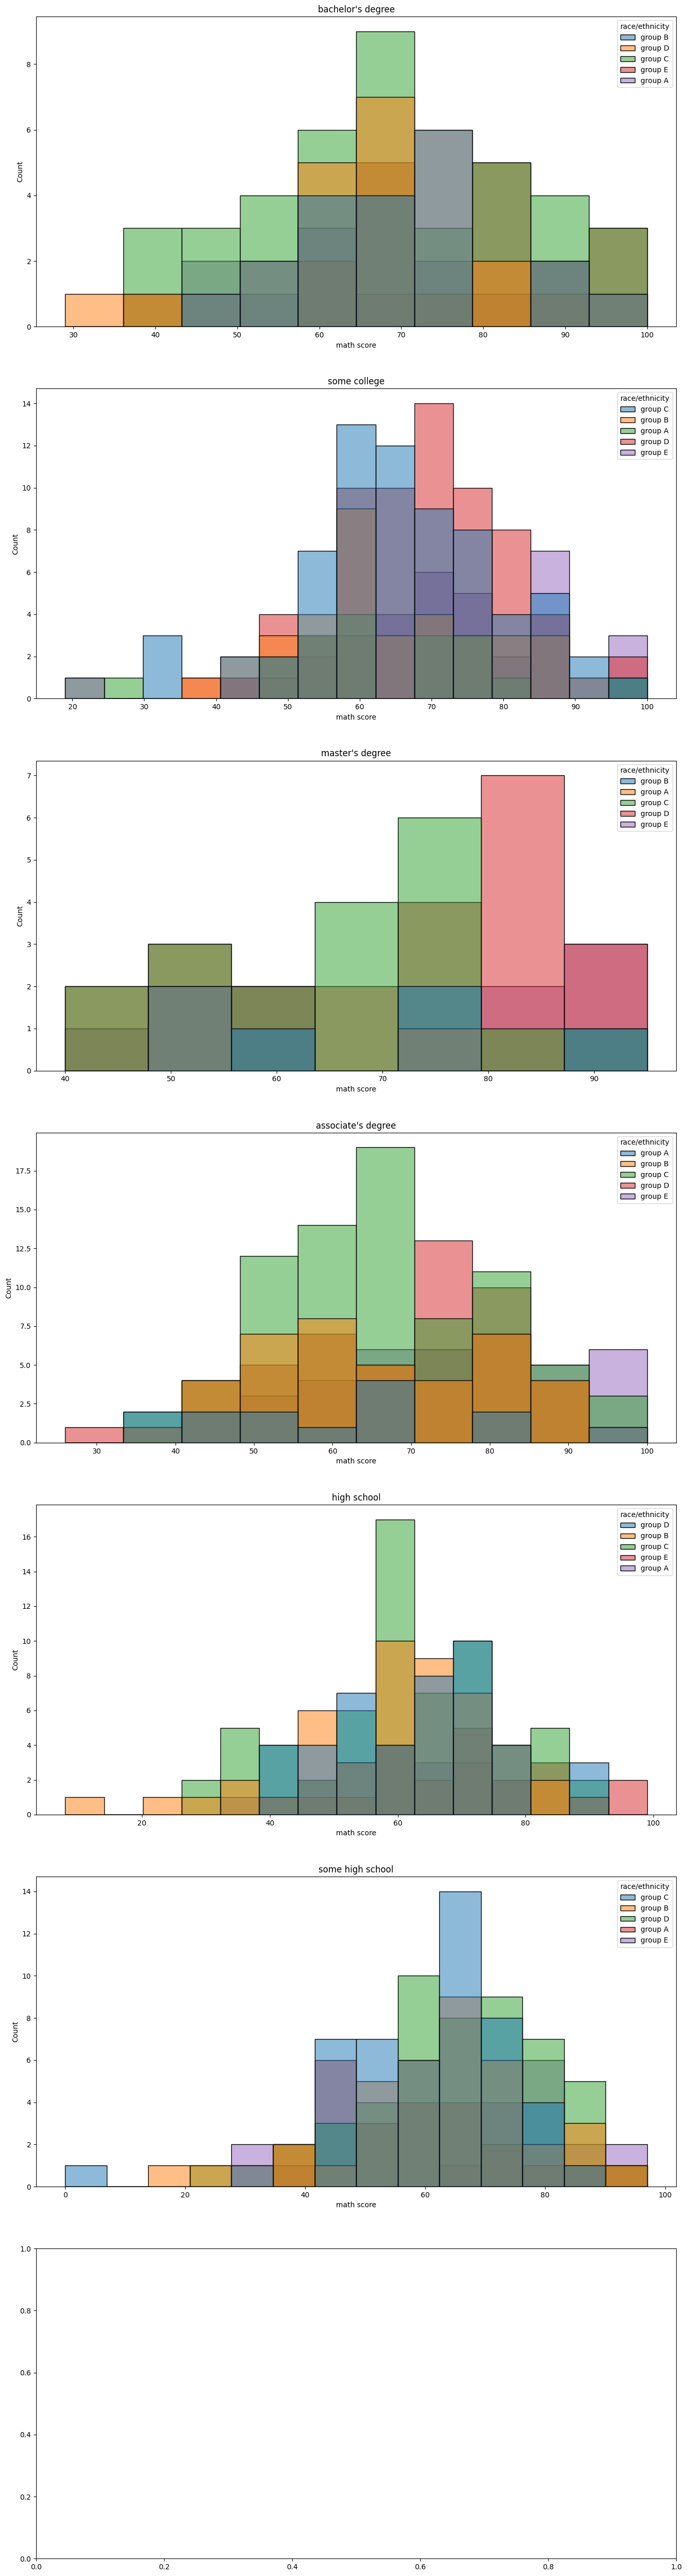

In [7]:
fig, axs = plt.subplots(nrows=7, ncols=1, figsize=(16,64))
i = 0
for educ in df["parental level of education"].unique():
    mascara = (df['parental level of education'] == educ)
    matriz = df[mascara]
    sns.histplot(data=matriz, x="math score", hue="race/ethnicity", ax=axs[i])
    axs[i].set_title(educ)
    i += 1


In [8]:
media = df["math score"].mean()
df["desvio"] = df["math score"].apply(lambda x: math.sqrt((x-media)**2/999))

In [9]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,desvio
0,female,group B,bachelor's degree,standard,none,72,72,74,0.187016
1,female,group C,some college,standard,completed,69,90,88,0.092100
2,female,group B,master's degree,standard,none,90,95,93,0.756511
3,male,group A,associate's degree,free/reduced,none,47,57,44,0.603949
4,male,group C,some college,standard,none,76,78,75,0.313570


In [10]:
df.groupby(["parental level of education", "gender"])["desvio"].sum()

parental level of education  gender
associate's degree           female    44.623841
                             male      43.699867
bachelor's degree            female    24.295629
                             male      20.465207
high school                  female    36.506135
                             male      35.135741
master's degree              female    15.381991
                             male      10.056107
some college                 female    38.984387
                             male      40.932565
some high school             female    38.985874
                             male      31.236410
Name: desvio, dtype: float64

In [11]:
df.groupby(["lunch"])[["math score", "writing score", "reading score"]].mean()

,math score,writing score,reading score
lunch,,,
free/reduced,58.921127,63.022535,64.653521
standard,70.034109,70.823256,71.654264
